In [1]:
import math
import numpy as np
import pandas as pd
# model parameters
S0 = 100.0  # initial index level
T = 10.0  # time horizon
r = 0.05  # risk-less short rate
vol = 0.2  # instantaneous volatility

# simulation parameters
np.random.seed(100)
gbm_dates = pd.DatetimeIndex(start='30-09-2004',
                             end='31-08-2015',
                             freq='B')
M = len(gbm_dates)  # time steps
dt = 1 / 252.  # fixed for simplicity
df = math.exp(-r * dt)  # discount factor

In [2]:
def simulate_gbm():
    # stock price paths
    rand = np.random.standard_normal((M, I))  # random numbers
    S = np.zeros_like(rand)  # stock matrix
    S[0] = S0  # initial values
    for t in range(1, M):  # stock price paths
        S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt
                        + vol * rand[t] * math.sqrt(dt))

    gbm = pd.DataFrame(S[:, 0], index=gbm_dates, columns=['index'])
    gbm['returns'] = np.log(gbm['index'] / gbm['index'].shift(1))


    # Realized Volatility (eg. as defined for variance swaps)
    gbm['rea_var'] = 252 * np.cumsum(gbm['returns'] ** 2) / np.arange(len(gbm))
    gbm['rea_vol'] = np.sqrt(gbm['rea_var'])
    gbm = gbm.dropna()
    return gbm

In [3]:
I = 1  # index level paths
gbm = simulate_gbm()

In [4]:
gbm

,index,returns,rea_var,rea_vol
2004-10-01,99.244036,-0.007588,0.014511,0.120461
2004-10-04,98.597562,-0.006535,0.012637,0.112414
2004-10-05,97.285256,-0.013399,0.023506,0.153315
2004-10-06,98.363481,0.011022,0.025283,0.159006
2004-10-07,95.563600,-0.028878,0.062256,0.249511
2004-10-08,97.699223,0.022102,0.072396,0.269065
2004-10-11,96.778256,-0.009471,0.065283,0.255506
2004-10-12,97.179609,0.004139,0.057662,0.240130
2004-10-13,96.886306,-0.003023,0.051511,0.226961
2004-10-14,98.699320,0.018540,0.055022,0.234568


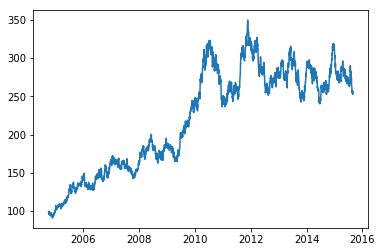

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(gbm['index'])

(array([   4.,    0.,    4.,    5.,    9.,   10.,   14.,   22.,   26.,
          28.,   21.,   55.,   75.,   68.,   97.,   88.,  125.,  127.,
         126.,  154.,  164.,  150.,  166.,  146.,  155.,  148.,  147.,
         112.,  122.,   88.,   91.,   56.,   59.,   52.,   37.,   28.,
          22.,   19.,    7.,    7.,    1.,    2.,    4.,    1.,    1.,
           1.,    1.,    0.,    1.,    1.]),
 array([-0.03960952, -0.03781748, -0.03602543, -0.03423339, -0.03244134,
        -0.03064929, -0.02885725, -0.0270652 , -0.02527316, -0.02348111,
        -0.02168907, -0.01989702, -0.01810498, -0.01631293, -0.01452088,
        -0.01272884, -0.01093679, -0.00914475, -0.0073527 , -0.00556066,
        -0.00376861, -0.00197657, -0.00018452,  0.00160752,  0.00339957,
         0.00519162,  0.00698366,  0.00877571,  0.01056775,  0.0123598 ,
         0.01415184,  0.01594389,  0.01773593,  0.01952798,  0.02132003,
         0.02311207,  0.02490412,  0.02669616,  0.02848821,  0.03028025,
         0.03207

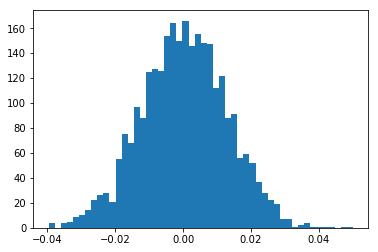

In [6]:
plt.hist(gbm['returns'],50)

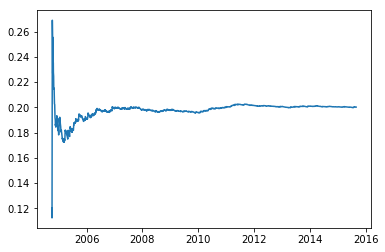

In [7]:
plt.plot(gbm['rea_vol'])

In [8]:
# mean return, volatility and correlation (252 days moving = 1 year)
def rolling_statistics(data):
    ''' Calculates and plots rolling statistics (mean, std, correlation). '''
    plt.figure(figsize=(11, 8))
    
    plt.subplot(311) 
    mr = data['returns'].rolling(window=252,center=False).mean()* 252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)

    plt.subplot(312)
    vo = data['returns'].rolling(window=252,center=False).std()* math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()

    plt.subplot(313)
    co = mr.rolling(window=252).corr(other=vo)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)

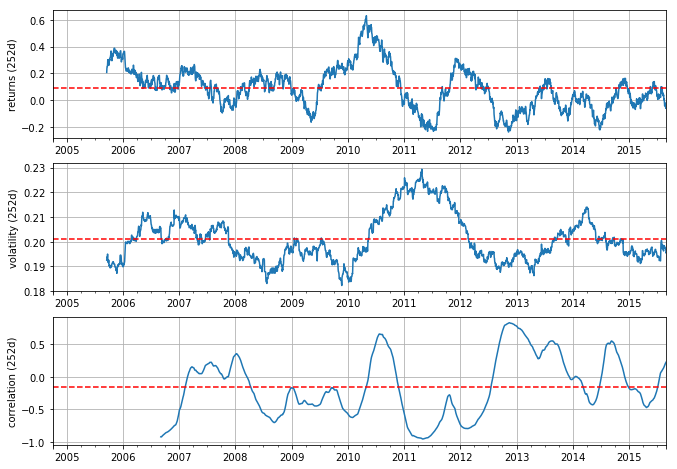

In [9]:
rolling_statistics(gbm)